In [2]:
import pandas as pd

# Replace 'data.csv' with your actual file name if different
df = pd.read_csv(r"C:\Users\Pranav\Downloads\archive (6).zip")

# Show first 5 rows
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Drop ID and unnamed column if present
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

# Encode diagnosis: M=1, B=0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Features and target
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2 features for visualization
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_2D, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Linear kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred_linear)

# RBF kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma=0.5)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Linear Kernel Accuracy: {acc_linear:.3f}")
print(f"RBF Kernel Accuracy: {acc_rbf:.3f}")


Linear Kernel Accuracy: 0.991
RBF Kernel Accuracy: 0.982


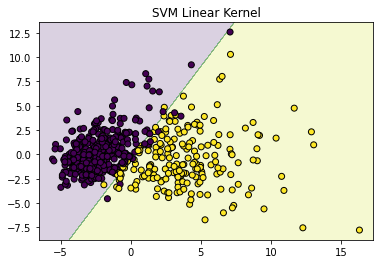

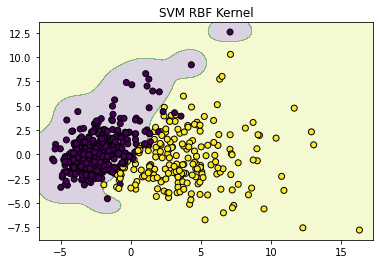

In [5]:
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.show()

# Plot both
plot_decision_boundary(svm_linear, X_2D, y, "SVM Linear Kernel")
plot_decision_boundary(svm_rbf, X_2D, y, "SVM RBF Kernel")


In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 0.5, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best CV Score: 0.9340659340659341


In [7]:
from sklearn.model_selection import cross_val_score

best_svm = grid.best_estimator_
cv_scores = cross_val_score(best_svm, X_2D, y, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-Validation Scores: [0.9122807  0.92105263 0.95614035 0.94736842 0.97345133]
Mean CV Accuracy: 0.9420586865393572
